## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In [0]:
!git clone https://github.com/AathmanT/P1_Facial_Keypoints.git

Cloning into 'P1_Facial_Keypoints'...
remote: Enumerating objects: 5984, done.
remote: Total 5984 (delta 0), reused 0 (delta 0), pack-reused 5984
Receiving objects: 100% (5984/5984), 329.49 MiB | 38.72 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Checking out files: 100% (5803/5803), done.


In [0]:
%cd P1_Facial_Keypoints/

/content/P1_Facial_Keypoints


In the next python cell we load in required libraries for this section of the project.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

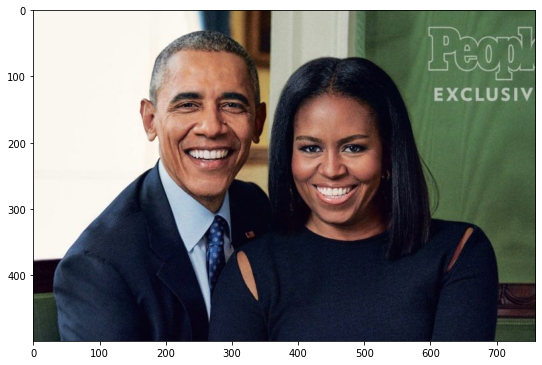

In [0]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


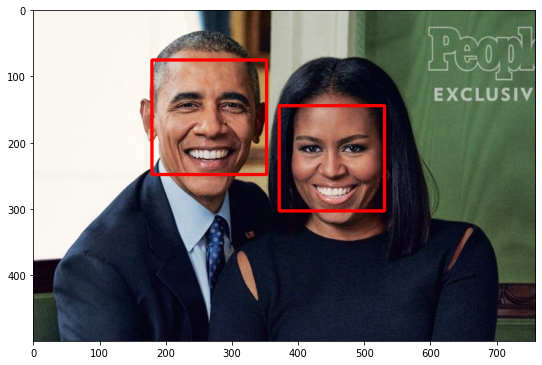

In [0]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [0]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('/content/drive/My Drive/keypoints_model_1.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=179776, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=136, bias=True)
  (drop1): Dropout(p=0.4, inplace=False)
)

In [0]:
def show_all_keypoints(image, predicted_key_pts):
    """Show image with predicted keypoints"""
    
    # image is grayscale
    plt.imshow(image, cmap='gray')
    # print("pp",predicted_key_pts)
    
    # predicted_key_pts = predicted_key_pts*50.0+100


    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




faces  [[179  75 173 173]
 [371 144 159 159]]
num_faces  2
roi shape  (173, 173, 3)
(224, 224)
(224, 224, 1)
output_pts [[[ 55.914173  90.87587 ]
  [ 57.766426 110.57524 ]
  [ 60.719337 123.37955 ]
  [ 63.66845  137.27399 ]
  [ 69.2417   151.8959  ]
  [ 80.35182  166.1854  ]
  [ 87.51338  174.79108 ]
  [102.60664  181.05824 ]
  [120.10378  184.14238 ]
  [139.29985  181.46426 ]
  [149.98048  174.81386 ]
  [160.05722  163.60129 ]
  [166.2124   152.66072 ]
  [172.57727  135.10237 ]
  [169.9919   121.31421 ]
  [175.04123  107.59225 ]
  [177.1686    92.006805]
  [ 72.577805  78.83396 ]
  [ 78.20669   73.15327 ]
  [ 90.84805   72.02757 ]
  [ 96.47388   73.13464 ]
  [102.4456    74.053635]
  [132.99379   74.81076 ]
  [139.59868   70.59505 ]
  [146.75887   73.17062 ]
  [153.71358   73.0308  ]
  [163.18802   77.80256 ]
  [119.71431   90.68425 ]
  [119.20207  101.04163 ]
  [122.01914  110.48773 ]
  [119.00338  122.317566]
  [111.28563  124.83106 ]
  [113.977936 128.37022 ]
  [120.34233  130.3197

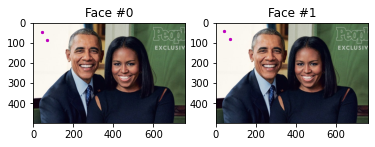

In [0]:
image_copy = np.copy(image)

print("faces ",faces)
# loop over the detected faces from your haar cascade
n=0
num_faces = faces.shape[0]
print("num_faces ",num_faces)

for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    roi_copy = np.copy(roi)

    height_roi = roi.shape[0]
    width_roi = roi.shape[1]
    print("roi shape ",roi.shape)

    ax = plt.subplot(1, num_faces, n + 1)
    # plt.imshow(roi)
    ax.set_title('Face #{}'.format(n))
    n+=1


    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255

    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))  # resize the image to get a square 224*224 image.
    print(roi.shape)
    roi = np.reshape(roi,(224,224,1))
    print(roi.shape)
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = roi.transpose(2, 0, 1)

    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints

    roi = torch.from_numpy(roi).type(torch.FloatTensor)
    roi = roi.unsqueeze(0)
    output_pts = net(roi)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    output_pts = output_pts.detach().numpy()
    output_pts = output_pts*50.0+100
    print("output_pts",output_pts)

    output_pts = output_pts*(width_roi / 224, height_roi / 224)

    ## TODO: Display each detected face and the corresponding keypoints 
    show_all_keypoints(image,output_pts)
       
plt.show()  

